# Reading Receipts with Python
Author: Dario Radečić @ Neos
***

- The goal of this notebook is to demonstrate how Python, OpenCV, and Tesseract can be used to extract text from a receipt
- Make sure to install libraries listed in the `requirements.txt` file first:

```
pip install -r requirements.txt
```

- Also, make sure Tesseract-lang is installed on your system

In [1]:
import warnings
warnings.filterwarnings("ignore")

import re
import cv2
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
display.set_matplotlib_formats("svg")  # For better in-notebook resolution

In [2]:
def show_image(image):
    plt.figure(figsize=(14, 8))
    # Turn off axes and axis ticks
    plt.axis("off")
    # Convert from BGR to RGB
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

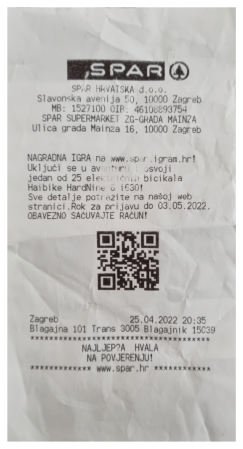

In [3]:
# Read and display the default image
im = cv2.imread("data/example1.jpg")
show_image(im)

<br>

## Reading from the receipt
- The `read_from_receipt()` Python function applies grayscaling, blurring, and thresholding operations to a specified image
- Then, Tesseract OCR is applied to if for text extraction
- For tweaking the results, consider:
    - Specifying `lang="hrv"` in a call to `pytesseract.image_to_string()` for language-specific receipts. Change `hrv` to match the language of your receipt. Doesn't work the best all the time.
    - Swap `--psm 4` with some other value, but we found this one to work the best
    - Play around with the threshold value, the range between 150 and 170 should work the best

In [4]:
def read_from_receipt(img_path: str, threshold: int = 160):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    ret, thresh1 = cv2.threshold(blur, threshold, 255, cv2.THRESH_BINARY)
    show_image(thresh1)
    text = str(pytesseract.image_to_string(thresh1, config="--psm 4"))
    return text

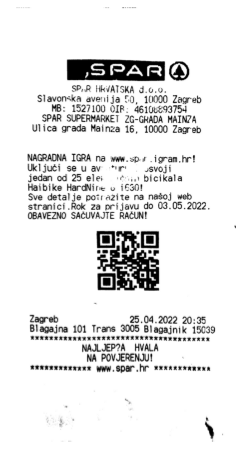

SPAR HRVATSKA d.o.o.
Slavonska avenija 50, 10000 Zagreb
MB: 1527100 OIR: 46108893754
SPAR SUPERMARKET Z2G-GRADA MAINZA
Ulica grada Mainza 16, 10000 Zagreb

NAGRADNA IGRA na www. Spar. igram. hr!
Ukljuci se u av ur | osvoji

jedan od 25 ele: fin bicikala
Haibike HardNine vo 1630!

Sve detalje poirazite na nasoj web
stranici.Rok za prijavu do 03.05.2022.
OBAVEZNO SACUVAJTE RACUN!

Zagreb 25.04.2022 20:35
Blagajna 101 Trans 3005 Blagajnik 15039
KKKKKKKKKKKKKKKKKKKKAKKKKKKKEKKKKRE KE KKK
NAJLJEP?A HVALA
NA POVJERENJU!

OOOO WWW. SDAP PT 200 KG



In [5]:
print(read_from_receipt(img_path="data/example1.jpg", threshold=160))